# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [2]:
print("Чтобы можно было в точности воспроизвести результаты.")

Чтобы можно было в точности воспроизвести результаты.


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [3]:
df_train = pd.read_csv(
    "https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv"
)
df_test = pd.read_csv(
    "https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv"
)

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [4]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [5]:
pd.concat([df_test.head(), df_test.tail()])

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [6]:
df_train.describe(include="all")

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [7]:
df_test.describe(include="all")

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [8]:
na_sum_train = df_train.isna().sum()
na_sum_train

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [9]:
na_sum_test = df_test.isna().sum()
na_sum_test

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

In [10]:
na_cols_train = na_sum_train[na_sum_train > 0].index.to_list()
na_cols_test = na_sum_test[na_sum_test > 0].index.to_list()
assert set(na_cols_train) == set(na_cols_test)
print("Пропуски в колонках:", na_cols_train)

Пропуски в колонках: ['mileage', 'engine', 'max_power', 'torque', 'seats']


(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [11]:
duplicates = df_train.drop("selling_price", axis=1).duplicated()
print("Количество повторяющихся объектов:", duplicates.sum())

Количество повторяющихся объектов: 1159


(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [12]:
df_train[duplicates]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [13]:
df_train = df_train[~duplicates]
df_train.shape

(5840, 13)

In [14]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [15]:
df_train.reset_index(drop=True, inplace=True)
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


In [16]:
df_train_wo_duplicates = df_train.copy()
df_test_wo_duplicates = df_test.copy()

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [17]:
def convert_torque(text):
    text = text.strip()

    if text.count("kgm") == 1:
        text = text.replace("kgm", "")
        text = float(text) * 9.80665
    elif text.count("nm") == 1:
        text = text.replace("nm", "")
        text = float(text)

    return int(float(text) + 0.5)


def convert_max_torque(text):
    text = text.strip()
    text = text.replace("rpm", "")

    if "+/-" in text:
        max_torque, _ = text.split("+/-")
        text = float(max_torque)

    elif "~" in text or "-" in text:
        text = text.replace("-", " ")
        text = text.replace("~", " ")
        max_torque_low, max_torque_high = text.split()
        text = (float(max_torque_low) + float(max_torque_high)) / 2

    return int(float(text) + 0.5)


def convert(text):
    if pd.isna(text):
        return [text, text]

    text = text.lower()
    text = text.replace("at", "@")
    text = text.replace(",", "")
    text = text.replace(")", "")

    if text.count("(") == 1 and text.count("@") == 2:
        parts = text.split("(")
        first_part, second_part = parts[0].split("@"), parts[1].split("@")
        torque = first_part[0] + second_part[0]
        max_torque = first_part[1] + second_part[1]
        return [convert_torque(torque), convert_max_torque(max_torque)]

    elif text.count("(") == 0 and text.count("@") == 1:
        torque, max_torque = text.split("@")
        return [convert_torque(torque), convert_max_torque(max_torque)]

    elif "/" in text:
        torque, max_torque = text.split("/")
        return [convert_torque(torque), convert_max_torque(max_torque)]

    elif text.count("(") == 1 and text.count("@") == 1:
        text = text[text.find("(") + 1 :]
        torque, max_torque = text.split("@")
        return [convert_torque(torque), convert_max_torque(max_torque)]

    else:
        return [convert_torque(text), np.nan]


def remove_extra_units(text):
    if pd.isna(text):
        return text

    text = text.replace("kmpl", "").replace("km/kg", "")
    text = text.replace("CC", "")
    text = text.replace("bhp", "")

    text = text.strip()

    if text:
        return text
    else:
        return np.nan


def format_columns(df):
    df[["torque", "max_torque_rpm"]] = df["torque"].apply(
        lambda x: pd.Series(convert(x))
    )
    df["max_torque_rpm"] = pd.to_numeric(df["max_torque_rpm"], downcast="float")
    df["torque"] = pd.to_numeric(df["torque"], downcast="float")
    df["mileage"] = pd.to_numeric(
        df["mileage"].apply(remove_extra_units), downcast="float"
    )
    df["engine"] = pd.to_numeric(
        df["engine"].apply(remove_extra_units), downcast="float"
    )
    df["max_power"] = pd.to_numeric(
        df["max_power"].apply(remove_extra_units), downcast="float"
    )
    return df


na_cols_train.append("max_torque_rpm")
na_cols_test.append("max_torque_rpm")

df_train = format_columns(df_train)
df_test = format_columns(df_test)
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.400000,1248.0,74.000000,190.0,5.0,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.139999,1498.0,103.519997,250.0,5.0,2000.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.000000,1396.0,90.000000,220.0,5.0,2250.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.100000,1298.0,88.199997,113.0,5.0,4500.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.139999,1197.0,81.860001,114.0,5.0,4000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.920000,1086.0,62.099998,96.0,5.0,3000.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.900000,998.0,67.099998,90.0,5.0,3500.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.500000,1197.0,82.849998,114.0,5.0,4000.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.799999,1493.0,110.000000,235.0,5.0,2325.0


(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [18]:
df_train[na_cols_train] = df_train[na_cols_train].fillna(
    df_train[na_cols_train].median()
)
df_test[na_cols_test] = df_test[na_cols_test].fillna(df_train[na_cols_train].median())

assert df_train.isna().sum().sum() == 0
assert df_test.isna().sum().sum() == 0


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [19]:
df_train["seats"].value_counts()

seats
5.0     4618
7.0      800
8.0      191
4.0       94
9.0       68
6.0       48
10.0      18
2.0        2
14.0       1
Name: count, dtype: int64

In [20]:
print(
    "В seats не так много различных значений. Это не непрерывная переменная,\n"
    "а дискретная. Возможно, даже порядок не имеет значение, т.е. если в машине 7 мест,\n"
    "а не 5 - это не факт, что линейно повлияет на цену."
)

В seats не так много различных значений. Это не непрерывная переменная,
а дискретная. Возможно, даже порядок не имеет значение, т.е. если в машине 7 мест,
а не 5 - это не факт, что линейно повлияет на цену.


In [21]:
df_train["engine"] = pd.to_numeric(df_train["engine"], downcast="integer")
df_train["seats"] = pd.to_numeric(df_train["seats"], downcast="integer")
df_test["engine"] = pd.to_numeric(df_test["engine"], downcast="integer")
df_test["seats"] = pd.to_numeric(df_test["seats"], downcast="integer")

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5840 non-null   object 
 1   year            5840 non-null   int64  
 2   selling_price   5840 non-null   int64  
 3   km_driven       5840 non-null   int64  
 4   fuel            5840 non-null   object 
 5   seller_type     5840 non-null   object 
 6   transmission    5840 non-null   object 
 7   owner           5840 non-null   object 
 8   mileage         5840 non-null   float32
 9   engine          5840 non-null   int16  
 10  max_power       5840 non-null   float32
 11  torque          5840 non-null   float32
 12  seats           5840 non-null   int8   
 13  max_torque_rpm  5840 non-null   float32
dtypes: float32(4), int16(1), int64(3), int8(1), object(5)
memory usage: 473.5+ KB


## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

/home/seara/.pyenv/versions/3.9.16/envs/DS/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


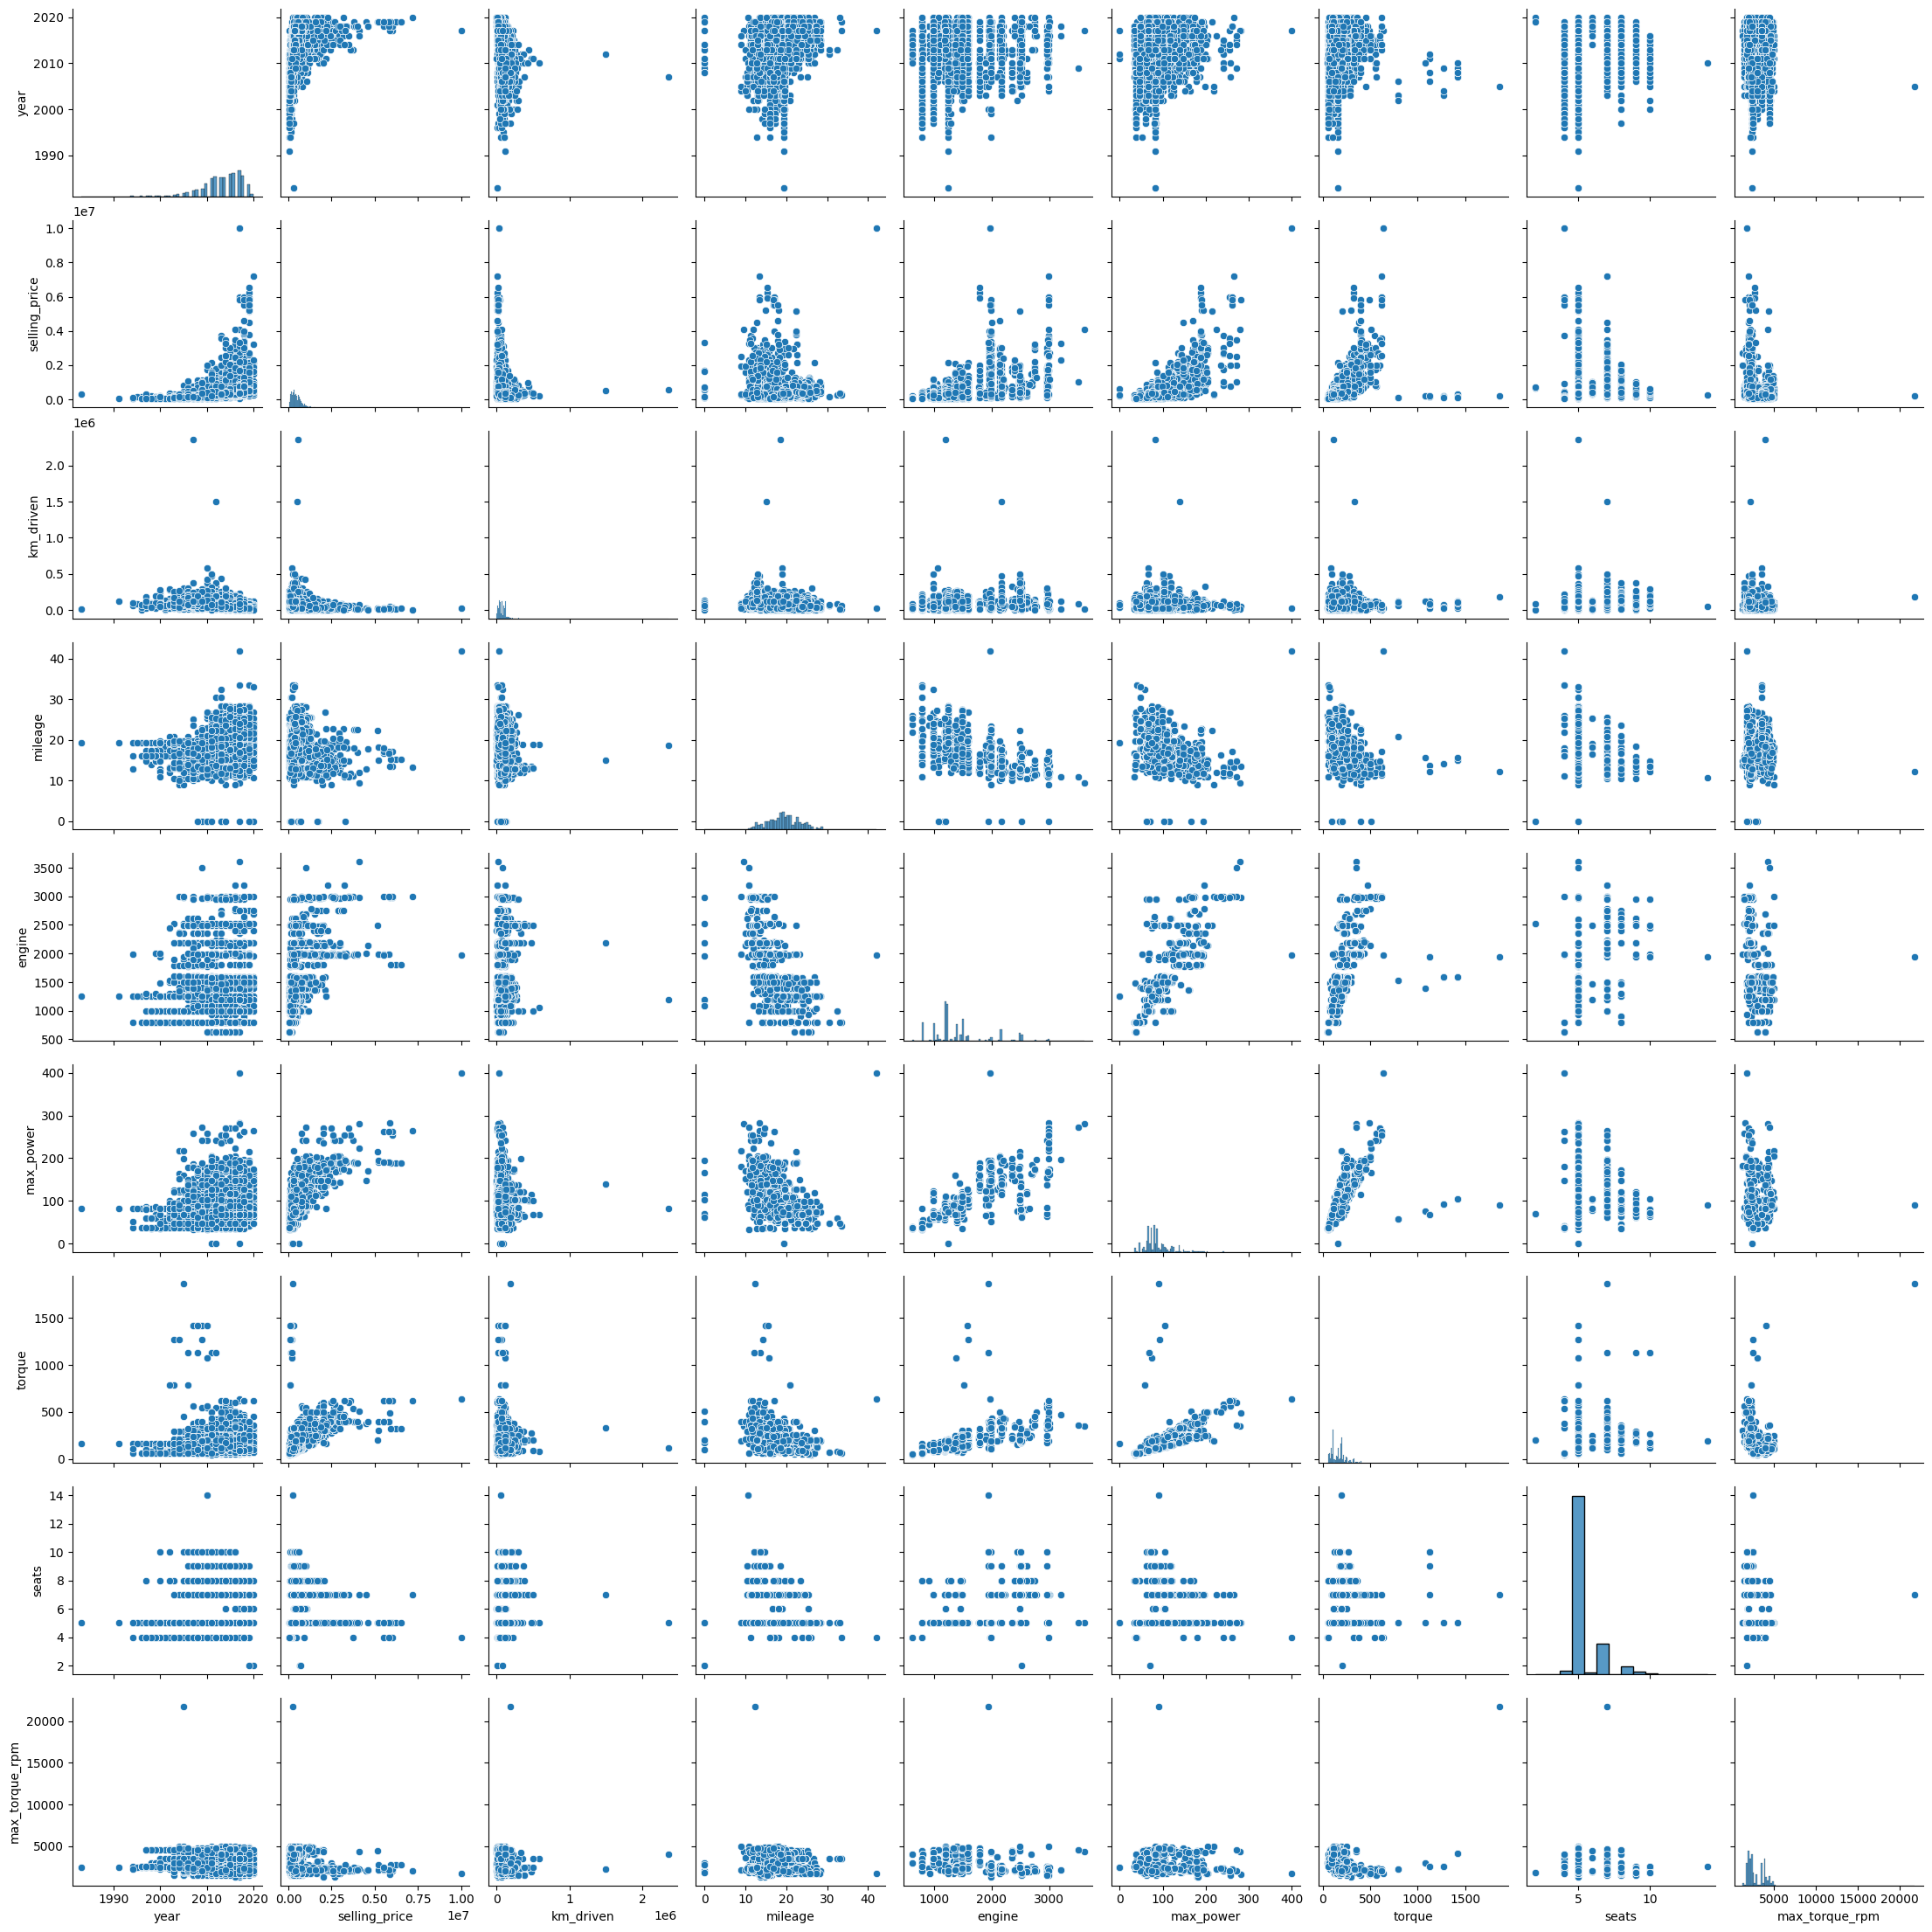

In [23]:
sns.pairplot(df_train);

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

> 1. Многие признаки имеют видимую зависимость от таргета. Например, чем меньше `km_driven`, тем больше таргет или чем больше `year`, тем больше таргет.
> Но не все зависимости линейные, например, похоже, что `km_driven` и `selling` имеют экспоненциальную зависимость.
> 2. Некоторые признаки сильно коррелируют, например, `torque` и `max_power`, `torque` и `engine`. (видна линейная зависимость)

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

/home/seara/.pyenv/versions/3.9.16/envs/DS/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


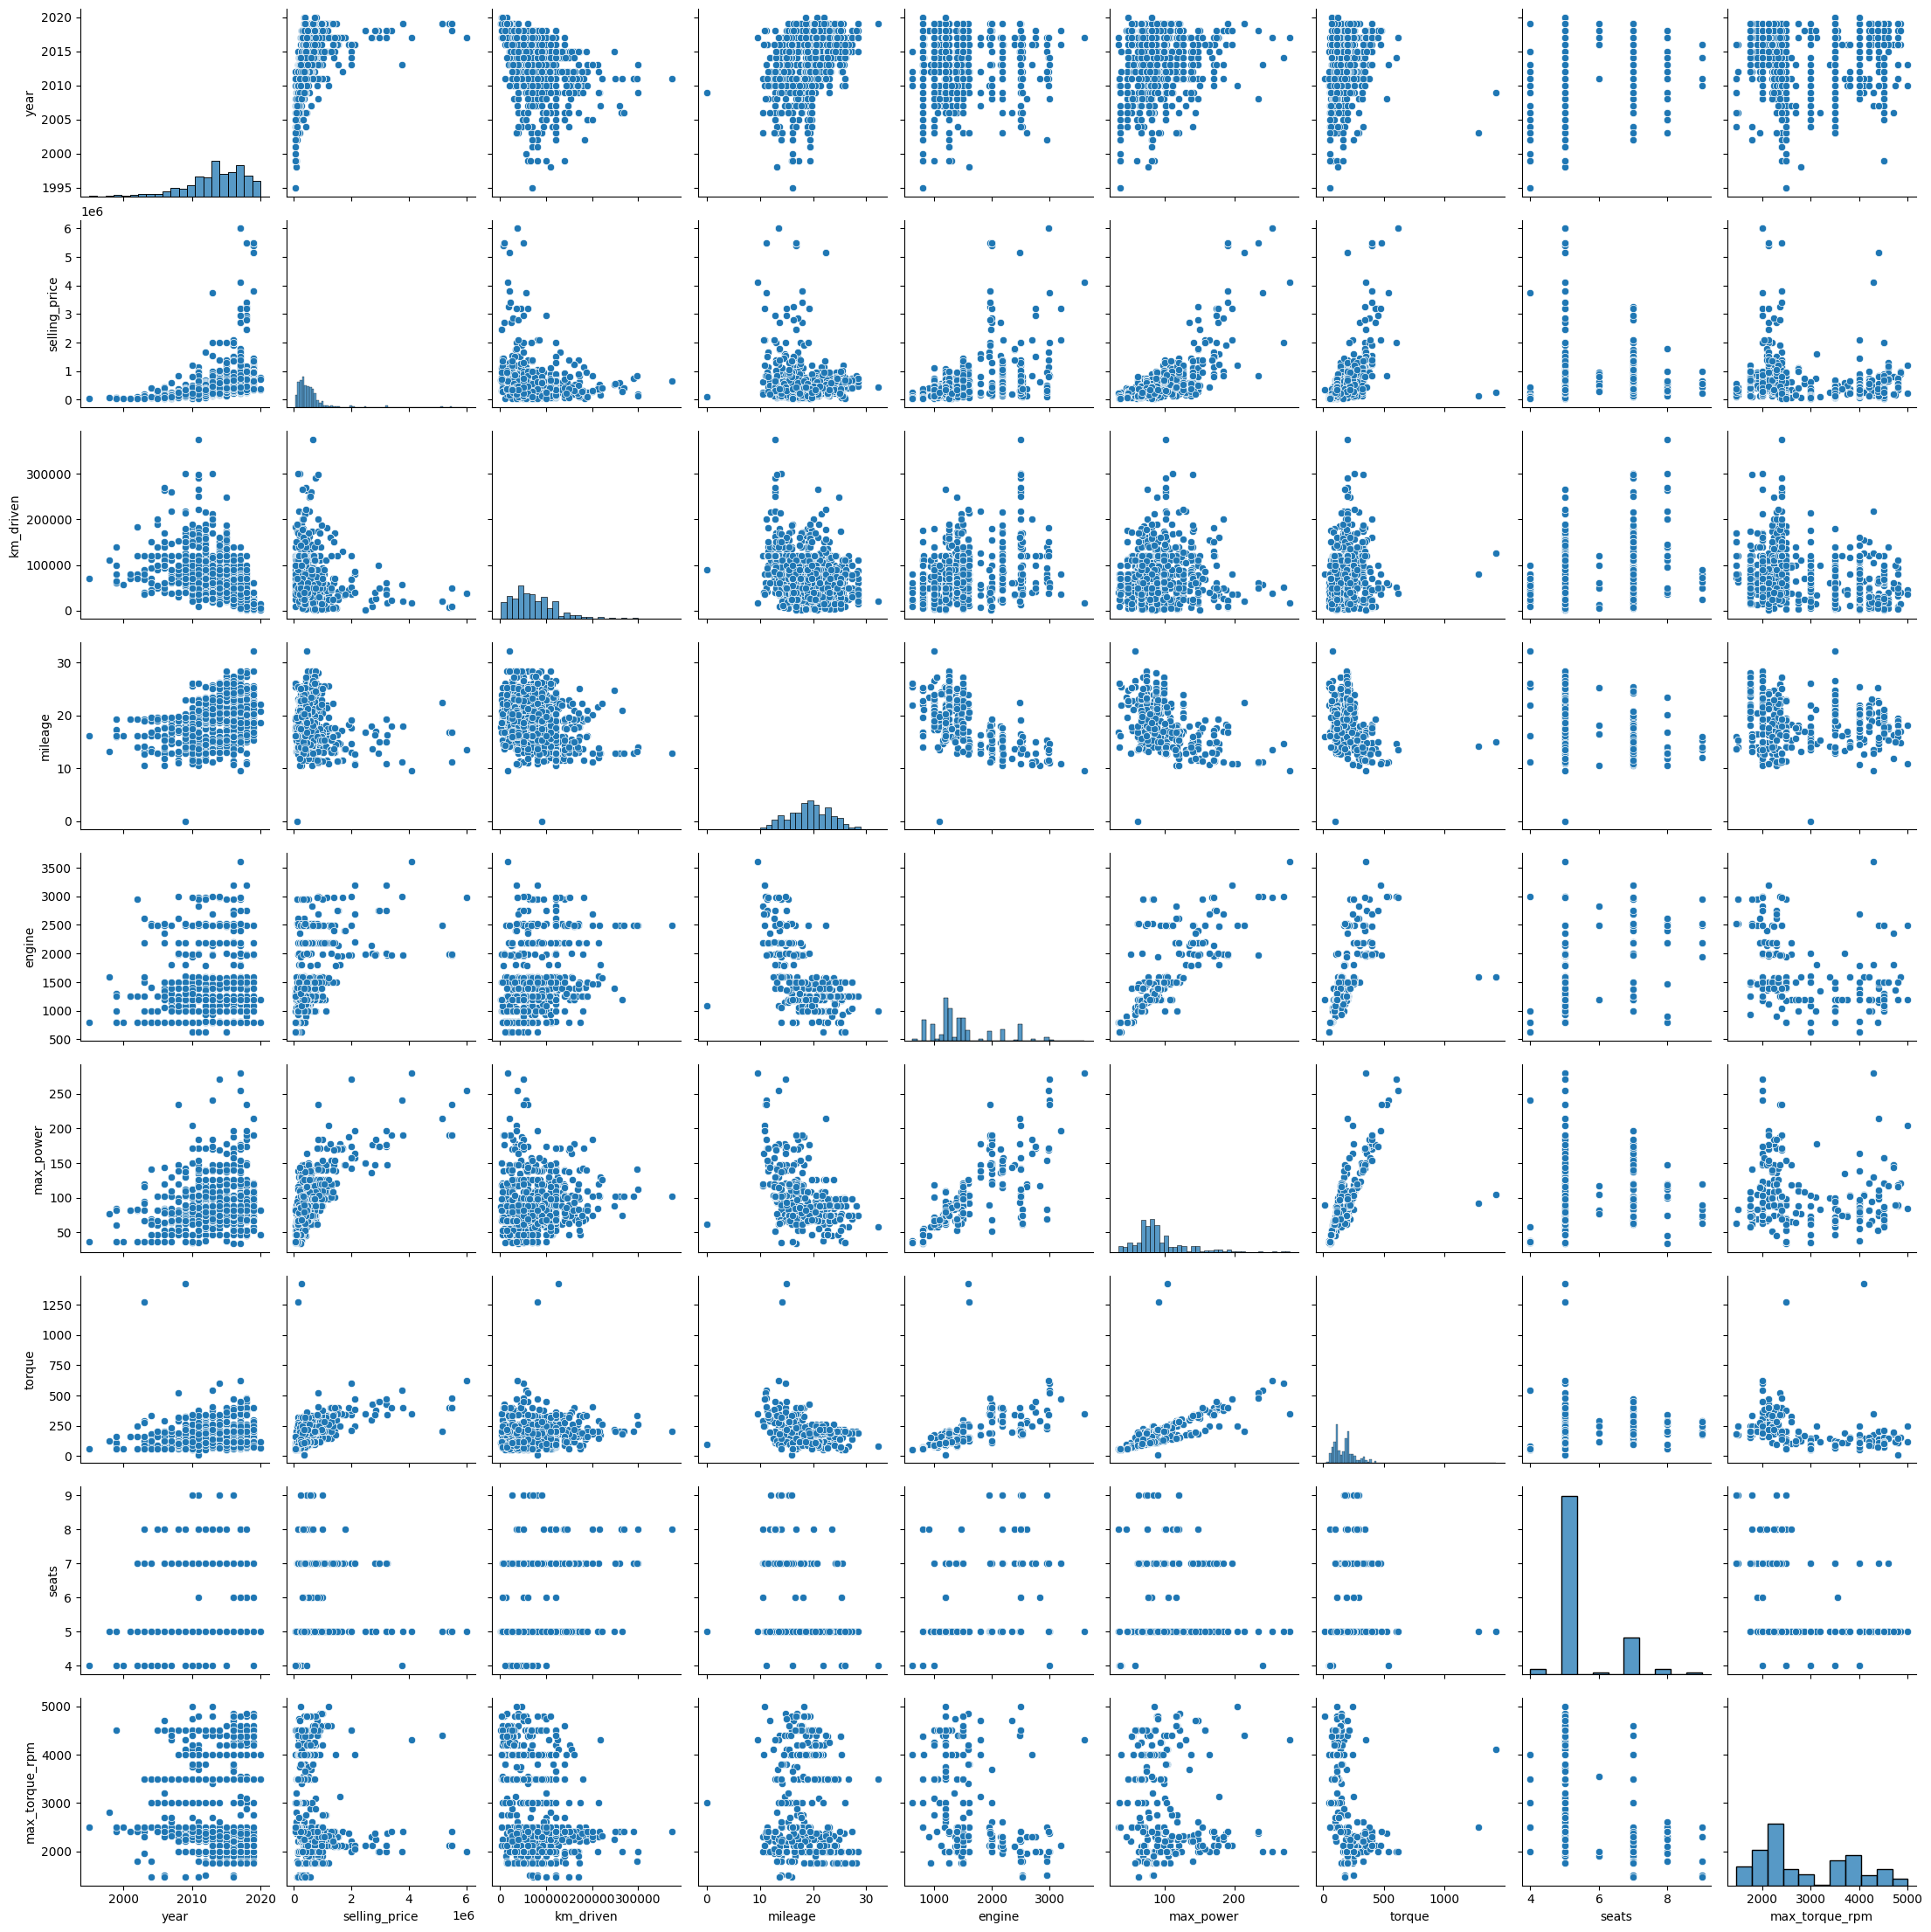

In [24]:
sns.pairplot(df_test);

> Трейн и текст оказались очень похожими

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

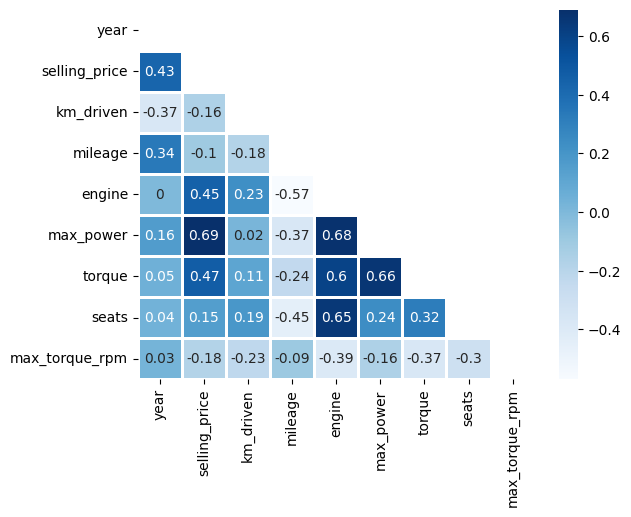

In [25]:
corrs = df_train.corr(numeric_only=True).round(2)
sns.heatmap(
    corrs,
    annot=True,
    cmap="Blues",
    mask=np.triu(np.ones_like(corrs, dtype=bool)),
    linewidths=2,
);

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

> 1. `year` и `engine`
> 2. `max_power` и `engine`
> 3. Да, это видно и по отрицательной корреляции и по визуализации.

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

/home/seara/.pyenv/versions/3.9.16/envs/DS/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


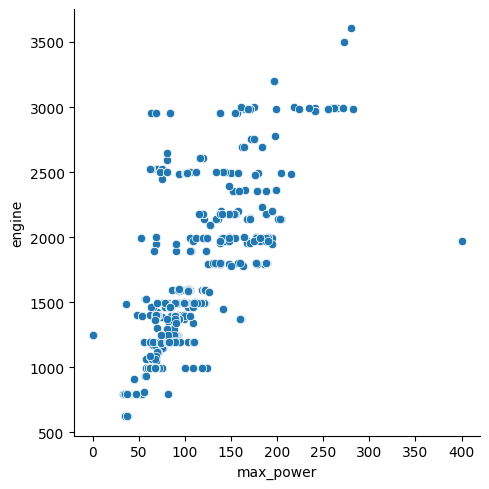

In [26]:
sns.relplot(df_train, x="max_power", y="engine", kind="scatter");

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

> Можно получить линейную зависимость `selling_price` от `year` прологарифмировав `selling_price`

/home/seara/.pyenv/versions/3.9.16/envs/DS/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


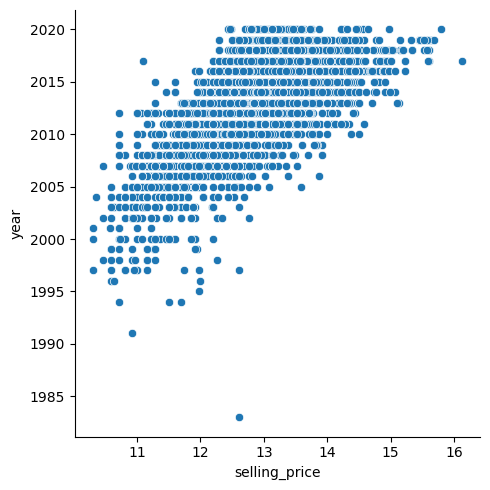

In [27]:
df_temp = df_train.copy()
df_temp["selling_price"] = np.log(df_temp["selling_price"] + 1)

sns.relplot(df_temp, x="selling_price", y="year", kind="scatter");

/home/seara/.pyenv/versions/3.9.16/envs/DS/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


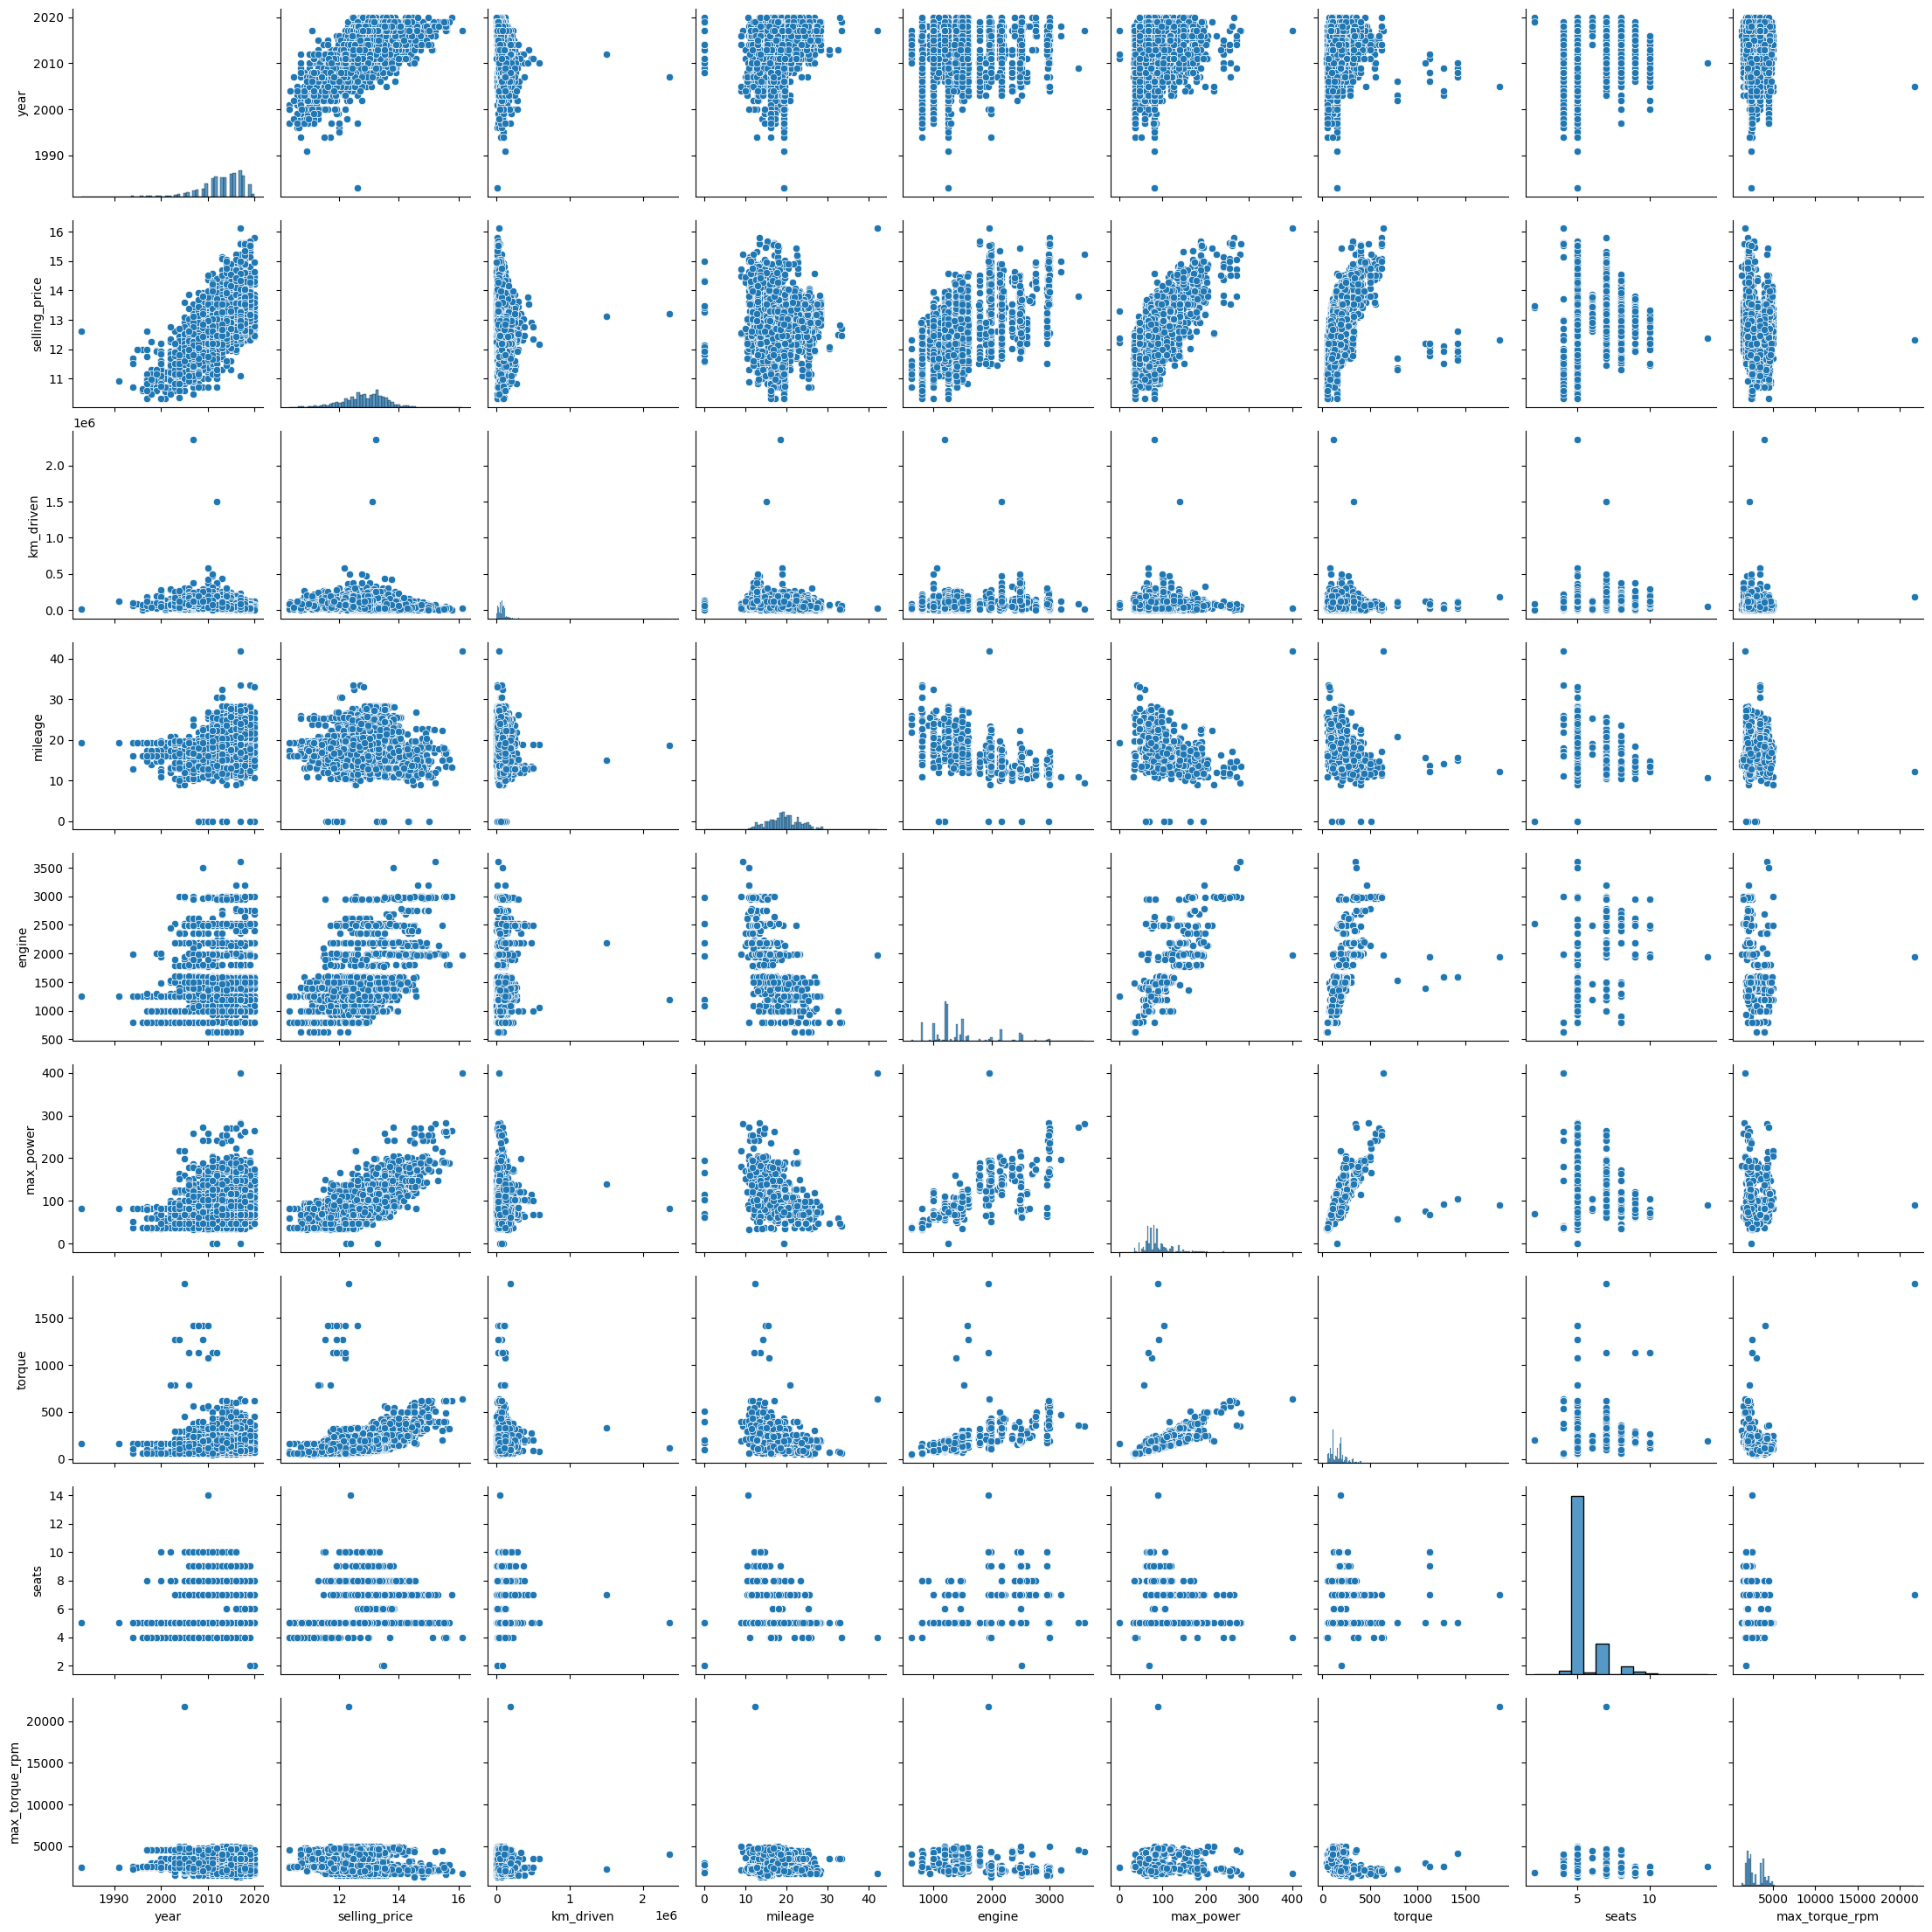

In [28]:
sns.pairplot(df_temp);

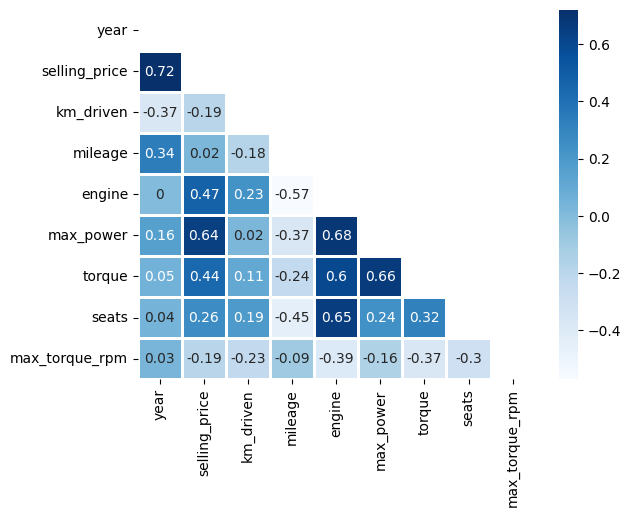

In [29]:
corrs = df_temp.corr(numeric_only=True).round(2)
sns.heatmap(
    corrs,
    annot=True,
    cmap="Blues",
    mask=np.triu(np.ones_like(corrs, dtype=bool)),
    linewidths=2,
);

> Теперь `selling_price` очень сильно коррелирует с year.

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [30]:
numeric_columns = (
    df_train.drop("selling_price", axis=1).select_dtypes(include=np.number).columns
)

In [31]:
y_train = df_train["selling_price"]
X_train = df_train[numeric_columns]
X_train.shape

(5840, 8)

In [32]:
y_test = df_test["selling_price"]
X_test = df_test[numeric_columns]
X_test.shape

(1000, 8)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()

model.fit(X_train, y_train)
pred = model.predict(X_test)

print("R2:", r2_score(y_test, pred))
print("MSE:", MSE(y_test, pred))

R2: 0.5993407662598451
MSE: 230310368634.0591


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()

model.fit(X_train_scaled, y_train)
pred = model.predict(X_test_scaled)

print("R2:", r2_score(y_test, pred))
print("MSE:", MSE(y_test, pred))

R2: 0.5993407662598448
MSE: 230310368634.05933


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [35]:
print("Самый информативный:", X_train.columns[np.argmax(np.abs(model.coef_))])

Самый информативный: max_power


(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [36]:
from sklearn.linear_model import Lasso

model = Lasso()

model.fit(X_train_scaled, y_train)
pred = model.predict(X_test_scaled)

print("R2:", r2_score(y_test, pred))
print("MSE:", MSE(y_test, pred))

R2: 0.5993395129278786
MSE: 230311089085.0632


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [37]:
model.coef_

array([165666.55467652, -49894.66394314,  -9615.10940043,  16565.36446379,
       324752.93776898,   6932.73206935, -32304.79417912, -63077.25015265])

> Таргет не стандартизирован и имеет большие значения, поэтому и веса имеют большие значения.
>
> Чтобы их занулить нужно увеличивать коэффициент регуляризации.

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "alpha": [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000, 10000, 100000]
}

grid_search = GridSearchCV(
    Lasso(), param_grid, cv=10, scoring="neg_mean_squared_error", n_jobs=-1, verbose=1
)

grid_search.fit(X_train_scaled, y_train)

print()
print("Веса:", grid_search.best_estimator_.coef_)
print()
print("Лучшие параметры:", grid_search.best_params_)

Fitting 10 folds for each of 11 candidates, totalling 110 fits



Веса: [153742.84503566 -40391.79489887      0.              0.
 330157.47018176   1450.2890717   -3812.83082803 -48702.75442016]

Лучшие параметры: {'alpha': 10000}


In [39]:
list(zip(X_train.columns, grid_search.best_estimator_.coef_))

[('year', 153742.84503566424),
 ('km_driven', -40391.79489886633),
 ('mileage', 0.0),
 ('engine', 0.0),
 ('max_power', 330157.47018175723),
 ('torque', 1450.2890716966024),
 ('seats', -3812.830828026034),
 ('max_torque_rpm', -48702.75442016424)]

In [40]:
pred = grid_search.predict(X_test_scaled)
print("R2:", r2_score(y_test, pred))
print("MSE:", MSE(y_test, pred))

R2: 0.5861119612601802
MSE: 237914663504.83914


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

> 1. 110 моделей. 
> 2. Лучший коэффициент регуляризации - 10000. Признаки `mileage` и `engine` занулились.

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [41]:
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import GridSearchCV

param_grid = {
    "alpha": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    "l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9, 1],
}

grid_search = GridSearchCV(
    ElasticNet(),
    param_grid,
    cv=10,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    verbose=1,
)

grid_search.fit(X_train_scaled, y_train)

print()
print("Веса:", grid_search.best_estimator_.coef_)
print()
print("Лучшие параметры:", grid_search.best_params_)

Fitting 10 folds for each of 36 candidates, totalling 360 fits



Веса: [164448.34017936 -50300.69193234  -8373.08345482  22092.92099918
 316840.96887759  10392.12757361 -33296.37159593 -60536.81437595]

Лучшие параметры: {'alpha': 0.1, 'l1_ratio': 0.9}


In [42]:
pred = grid_search.predict(X_test_scaled)
print("R2", r2_score(y_test, pred))
print("MSE", MSE(y_test, pred))

R2 0.5970108090323449
MSE 231649694581.84244


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

> Лучшие параметры: {'alpha': 0.1, 'l1_ratio': 0.9}

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [43]:
X_train_cat = df_train.drop(["selling_price", "name"], axis=1)
y_train_full = df_train["selling_price"]
X_train_cat.shape

(5840, 12)

In [44]:
X_train_cat["seats"] = X_train_cat["seats"].astype("object")
X_train_cat.describe(include="object")

,fuel,seller_type,transmission,owner,seats
count,5840,5840,5840,5840,5840
unique,4,3,2,5,9
top,Diesel,Individual,Manual,First Owner,5
freq,3177,5223,5336,3603,4618


In [45]:
X_test_cat = df_test.drop(["selling_price", "name"], axis=1)
y_test_full = df_test["selling_price"]
X_test_cat.shape

(1000, 12)

In [46]:
X_test_cat["seats"] = X_test_cat["seats"].astype("object")
X_test_cat.describe(include="object")

,fuel,seller_type,transmission,owner,seats
count,1000,1000,1000,1000,1000
unique,4,3,2,5,6
top,Diesel,Individual,Manual,First Owner,5
freq,534,837,877,623,777


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [47]:
from sklearn.preprocessing import (
    OneHotEncoder,
)  # или можно использовать get_dummies из библиотеки pandas

cat_columns = X_train_cat.select_dtypes(include=["object"]).columns


encoder = OneHotEncoder(drop="first", sparse_output=False)

X_train_full = pd.concat(
    [
        X_train_cat.drop(cat_columns, axis=1),
        pd.DataFrame(
            encoder.fit_transform(X_train_cat[cat_columns]),
            columns=encoder.get_feature_names_out(),
        ),
    ],
    axis=1,
)
X_test_full = pd.concat(
    [
        X_test_cat.drop(cat_columns, axis=1),
        pd.DataFrame(
            encoder.transform(X_test_cat[cat_columns]),
            columns=encoder.get_feature_names_out(),
        ),
    ],
    axis=1,
)

In [48]:
X_train_full.shape

(5840, 25)

In [49]:
X_test_full.shape

(1000, 25)

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [50]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()

X_train_full_scaled = scaler.fit_transform(X_train_full)
X_test_full_scaled = scaler.transform(X_test_full)

param_grid = {
    "alpha": [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000, 10000, 100000]
}

grid_search = GridSearchCV(
    Ridge(), param_grid, cv=10, scoring="r2", n_jobs=-1, verbose=1
)

grid_search.fit(X_train_full_scaled, y_train_full)

print()
print("Лучшие параметры:", grid_search.best_params_)

Fitting 10 folds for each of 11 candidates, totalling 110 fits

Лучшие параметры: {'alpha': 100.0}


In [51]:
pred = grid_search.predict(X_test_full_scaled)
print("R2:", r2_score(y_test_full, pred))
print("MSE:", MSE(y_test_full, pred))

R2: 0.6303774826919692
MSE: 212469577755.6212


> Удалось улучшить качество. Было r2_score = 0.59, стало - r2_score = 0.63

# Часть 4 - бонусная (1.5 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

> Сделаю то, что показывал в визуализациях - прологарифмирую таргет.
>
> Оформлю всё в skleaen pipeline, чтобы было удобнее применять

In [52]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import TransformedTargetRegressor


class DataFramePreprocessor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.X_train = format_columns(X.copy())
        return self

    def transform(self, X, y=None):
        X_ = X.copy()
        X_ = format_columns(X_)

        na_cols = X_.columns[X_.isna().any()].tolist()
        X_[na_cols] = X_[na_cols].fillna(self.X_train[na_cols].median())

        X_["engine"] = pd.to_numeric(X_["engine"], downcast="integer")
        X_["seats"] = pd.to_numeric(X_["seats"], downcast="integer")

        X_ = X_.drop("name", axis=1)

        X_["seats"] = X_["seats"].astype("object")

        return X_

In [53]:
def apply_log(x):
    return np.log(x + 1)


def inverse_log(x):
    return np.exp(x) - 1


pipe = make_pipeline(
    DataFramePreprocessor(),
    make_column_transformer(
        (
            OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore"),
            make_column_selector(dtype_include=["category", "object"]),
        ),
        remainder="passthrough",
    ),
    StandardScaler(),
    TransformedTargetRegressor(
        ElasticNet(),
        func=apply_log,
        inverse_func=inverse_log,
    ),
)
pipe

Pipeline(steps=[('dataframepreprocessor', DataFramePreprocessor()),
                ('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9d13555be0>)])),
                ('standardscaler', StandardScaler()),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(func=<function apply_log at 0x7f9d134b09d0>,
                                            inverse_func=<function inverse_log at 0x7f9d154880d0>,
                                            regressor=ElasticNet()))])

In [54]:
param_grid = {
    "transformedtargetregressor__regressor__alpha": [
        0.001,
        0.01,
        0.1,
        1.0,
        10.0,
        100.0,
    ],
    "transformedtargetregressor__regressor__l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9, 1],
}

grid_search = GridSearchCV(pipe, param_grid, cv=10, scoring="r2", n_jobs=-1)
X = df_train_wo_duplicates.drop("selling_price", axis=1)
y = df_train_wo_duplicates["selling_price"]
grid_search.fit(X, y)

/home/seara/.pyenv/versions/3.9.16/envs/DS/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/seara/.pyenv/versions/3.9.16/envs/DS/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/seara/.pyenv/versions/3.9.16/envs/DS/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/seara/.pyenv/versions/3.9.16/envs/DS/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  war

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('dataframepreprocessor',
                                        DataFramePreprocessor()),
                                       ('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f9d13555be0>)])),
                                       ('st...
                                       ('transformedtargetregressor',
                                        TransformedTargetRegressor(func=<function apply_log at 0x7f9d134b09d0>,
                                                                   inverse_func=<function inverse_log at 0x7f9d154880d0>,
                                                                   regressor=ElasticNet()))]),
             n_jobs=-1,
             param_grid={'transformedtargetregressor__regressor__alpha': [0.001,
                                                                          0.01,
                                                                          0.1,
                                                                          1.0,
                                                                          10.0,
                                                                          100.0],
                         'transformedtargetregressor__regressor__l1_ratio': [0.1,
                                                                             0.3,
                                                                             0.5,
                                                                             0.7,
                                                                             0.9,
                                                                             1]},
             scoring='r2')

In [55]:
X_t = df_test_wo_duplicates.drop("selling_price", axis=1)
y_t = df_test_wo_duplicates["selling_price"]


pred = grid_search.predict(X_t)
print("R2:", r2_score(y_t, pred))
print("MSE:", MSE(y_t, pred))

R2: 0.8178232192020662
MSE: 104720415776.93774


In [56]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(grid_search, f)

# load
with open("model.pkl", "rb") as f:
    model = pickle.load(f)

In [57]:
pred = model.predict(X_t)
print("R2:", r2_score(y_t, pred))
print("MSE:", MSE(y_t, pred))

R2: 0.8178232192020662
MSE: 104720415776.93774


# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [58]:
def business_metrics(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred) <= 0.1 * y_true)


business_metrics(y_t, pred)

0.285

# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [59]:
# from fastapi import FastAPI
# from pydantic import BaseModel
# from typing import List

# app = FastAPI()


# class Item(BaseModel):
#     name: str
#     year: int
#     selling_price: int
#     km_driven: int
#     fuel: str
#     seller_type: str
#     transmission: str
#     owner: str
#     mileage: str
#     engine: str
#     max_power: str
#     torque: str
#     seats: float


# class Items(BaseModel):
#     objects: List[Item]


# @app.post("/predict_item")
# def predict_item(item: Item) -> float:
#     return ...


# @app.post("/predict_items")
# def predict_items(items: List[Item]) -> List[float]:
#     return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link